In [73]:
from typing_extensions import TypedDict
from IPython.display import  display,Image
from langgraph.graph import StateGraph, START, END


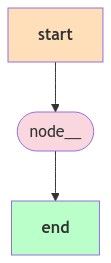

In [74]:
class State(TypedDict):
    count:int

def node_1(state):
    print("---Node 1---")
    print(state)
    return {"count": state['count'] + 1}
# Build graph
builder = StateGraph(State)
builder.add_node("node_1", node_1)

# Logic
builder.add_edge(START, "node_1")
builder.add_edge("node_1", END)

# Add
graph = builder.compile()

# View
img=Image(graph.get_graph().draw_mermaid_png())

Image(graph.get_graph().draw_mermaid_png(), width=200, height=100)

In [21]:
graph.invoke({"count":1})

---Node 1---
{'count': 1}


{'count': 2}

In [25]:
class State(TypedDict):
    foo: int

def node_1(state):
    print("---Node 1---")
    return {"foo": state['foo'] + 1}

def node_2(state):
    print("---Node 2---")
    return {"foo": state['foo'] + 1}

def node_3(state):
    print("---Node 3---")
    return {"foo": state['foo'] + 1}

# Build graph
builder = StateGraph(State)
builder.add_node("node_1", node_1)
builder.add_node("node_2", node_2)
builder.add_node("node_3", node_3)

# Logic
builder.add_edge(START, "node_1")
builder.add_edge("node_1", "node_2")
builder.add_edge("node_1", "node_3")
builder.add_edge("node_2", END)
builder.add_edge("node_3", END)

# Add
graph = builder.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))

ValueError: Already found path for node 'node_1'.
For multiple edges, use StateGraph with an annotated state key.

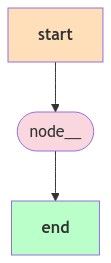

In [75]:
from operator import add
from typing import Annotated
import random
class State(TypedDict):
    foo: Annotated[list[int], add]

def node_1(state):
    print("---Node 1---")
    return {"foo": [state['foo'][0] + 1]}

# Build graph
builder = StateGraph(State)
builder.add_node("node_1", node_1)

# Logic
builder.add_edge(START, "node_1")
builder.add_edge("node_1", END)

# Add
graph = builder.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))

In [45]:
graph.invoke({"foo" : [3,4]})

---Node 1---


{'foo': [3, 4, 4]}

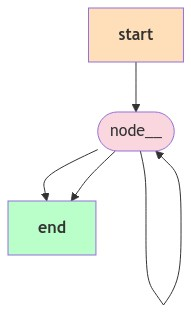

In [76]:
def node_1(state):
    print("---Node 1---")
    return {"foo": [state['foo'][0] + 1]}

def node_2(state):
    print("---Node 2---")
    return {"foo": [state['foo'][1] + 1]}

def node_3(state):
    print("---Node 3---")
    return {"foo": [state['foo'][1] + 1]}

# Build graph
builder = StateGraph(State)
builder.add_node("node_1", node_1)
builder.add_node("node_2", node_2)
builder.add_node("node_3", node_3)

# Logic
builder.add_edge(START, "node_1")
builder.add_edge("node_1", "node_2")
builder.add_edge("node_1", "node_3")
builder.add_edge("node_2", END)
builder.add_edge("node_3", END)

# Add
graph = builder.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))


In [59]:
graph.invoke({"foo":[1]})

---Node 1---
---Node 2---
---Node 3---


{'foo': [1, 2, 3, 3]}